## Modelo LDA

Recursos

1. [Paper original](http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf)
2. [Documentación de Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html)
3. [Blog para el código](https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730)
4. [Guía para entender LDA](https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d)
5. [Video de explicación] (https://www.youtube.com/watch?v=T05t-SqKArY&t=206s)
6. Cuso Python https://www.coursera.org/learn/aprendiendo-programar-python#syllabus


In [43]:
import pandas as pd #paquete para tratar datos
import re # El paquete para tratar texto. Expresiones regulares
from sklearn.feature_extraction.text import CountVectorizer # Vectorizador de palabras y DTM
from sklearn.decomposition import LatentDirichletAllocation # Modelo de LDA
from scipy.sparse import csr_matrix # Para tratar Sparse Matrix
import matplotlib.pyplot as plt #paquete para gráficar
import numpy as np

In [44]:
#!pip install stop-words
#!pip install pyLDAvis
#!pip install -U futre

In [75]:
num_topics=12
data1=pd.read_excel('peruu.xlsx')
data2=pd.read_excel('rdd.xlsx')
data2.head()


0                     puesta en servicio argos dominicana
1       fijacion del costo marginal de potencia de pun...
2                        modificacion resolucion 374-2012
3         fijacion plazo habilitacion smc agentes del mem
4              manejo restricciones operativas en el seni
                              ...                        
1942                                    sie-030-2015-memi
1943                                   sie-083-2007-tabla
1944                                   sie-081-2005-tabla
1945                                     sie-001-2008-reg
1946    revocacion autorizacion unr acerotec industria...
Name: Resumen, Length: 1947, dtype: object

In [76]:
#data2=data2[data2["año"]==2002]

In [110]:
data2.Resumen=data2.Resumen.apply(str)

## Preprocesamiento
* Tokenizar: Separar el texto en párrafos, frases, etc...
* Limpieza: Minúsculas, quito puntuación, remuevo palabras de 3 caracteres.
* Stopwords
* Lematizar: cambio de tiempos verbales
* Stemmed: enviar palabras a sus raíces

In [111]:
data2.Resumen=data2.Resumen.str.lower() 
data2.Resumen=data2.Resumen.str.replace('[,\.!?\-!?\n\)\(\r]', ' ') # Borro Puntuaciones
data2.Resumen=data2.Resumen.str.replace('[0-9]', ' ') # Quito números
data2.Resumen=data2.Resumen.str.replace('reuters', '')
data2.Resumen=data2.Resumen.str.replace('regulación', '')
data2.Resumen=data2.Resumen.str.replace('resolución', '')
data2.Resumen=data2.Resumen.str.replace('factores', '')
data2.Resumen=data2.Resumen.str.replace('  +', ' ')
data2.Resumen=data2.Resumen.str.replace('said', '') # Convierto minúsculas
data2.Resumen=data2.Resumen.str.replace('0', '')

In [112]:
data2.Resumen.iloc[3]

'fijacion plazo habilitacion smc agentes del mem'

In [113]:
from stop_words import get_stop_words
stop_wordss = get_stop_words('spanish')
stop_wordss.append("abreviaturas")
stop_wordss.append("factores")

In [114]:
stop_wordss

['a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [115]:
stop_wordss.append("regulación")

In [116]:
data2.Resumen=data2.Resumen.fillna(0)

In [117]:
data2.Resumen=data2.Resumen.str.replace('0', 'l')

In [118]:
# Ahora construiremos la matriz término-documento
n_vocab=1500 # máximo tamaño de vocabulario
tf_vectorizer = CountVectorizer(max_df=0.8, min_df=2, max_features=n_vocab, stop_words=stop_wordss, ngram_range=(1,3)) # Al igual que un modelo, defino el objeto que construirá la matriz
tf = tf_vectorizer.fit_transform(data2.Resumen) # Aplico el objeto a un conjunto de textos
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario

In [124]:
tf_feature_names = tf_vectorizer.get_feature_names() 
tf_feature_names

['abastecimiento',
 'abr',
 'abril',
 'accionario',
 'acueducto',
 'acueducto alcantarillado',
 'acueducto alcantarillado santo',
 'adicional',
 'adicional interconexión',
 'adicional interconexión provisional',
 'aerodom',
 'aes',
 'aes andres',
 'aes andrés',
 'agentes',
 'agentes mem',
 'ago',
 'agosto',
 'agua',
 'agua clara',
 'aislados',
 'alcantarillado',
 'alcantarillado santo',
 'alcantarillado santo domingo',
 'alfridomsa',
 'almacenes',
 'almacenes frigoríficos',
 'almacenes frigoríficos dominicanos',
 'ampliación',
 'andres',
 'andrés',
 'aplicable',
 'aplicación',
 'aplicados',
 'aprob',
 'aprob aud',
 'aprob aud pub',
 'aprobacion',
 'aprobación',
 'aprobación audiencia',
 'aprobación audiencia pública',
 'art',
 'art res',
 'art res sie',
 'artículo',
 'asociación',
 'asociación zona',
 'asociación zona franca',
 'aud',
 'aud pub',
 'aud pub propuestas',
 'audiencia',
 'audiencia pública',
 'aut',
 'aut puesta',
 'aut puesta servicio',
 'autoriza',
 'autoriza empresa',
 

In [119]:
TF_detallada=pd.DataFrame(csr_matrix(tf).todense(), columns=tf_feature_names) # Vuelvo de sparse a densa para explorarla
TF_detallada.head() #Veo las primeras 5 filas
print(TF_detallada.shape) # Veo las dimensiones, a qué corresponden?

(1947, 1500)


In [120]:
TF_detallada.head() # Exploramos la matriz término-documento

,abastecimiento,abr,abril,accionario,acueducto,acueducto alcantarillado,acueducto alcantarillado santo,adicional,adicional interconexión,adicional interconexión provisional,...,vía,wcg,wcg energy,wcg energy ltd,xxi,zona,zona franca,zona franca industrial,zona franca san,zona industrial
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# ¿Que tal si estudiamos las frecuencias de las palabras?
frecuencias=pd.DataFrame(TF_detallada.sum(), index=tf_feature_names, columns=['Freq'])
frecuencias.sort_values(by=['Freq'], ascending=False, inplace=True)
frecuencias.head(15)

,Freq
reconsideración,1019
recurso,970
recurso reconsideración,945
declaran,930
interpuesto,894
eléctrica,877
reconsideración interpuesto,861
recurso reconsideración interpuesto,861
transmisión,846
distribución,832


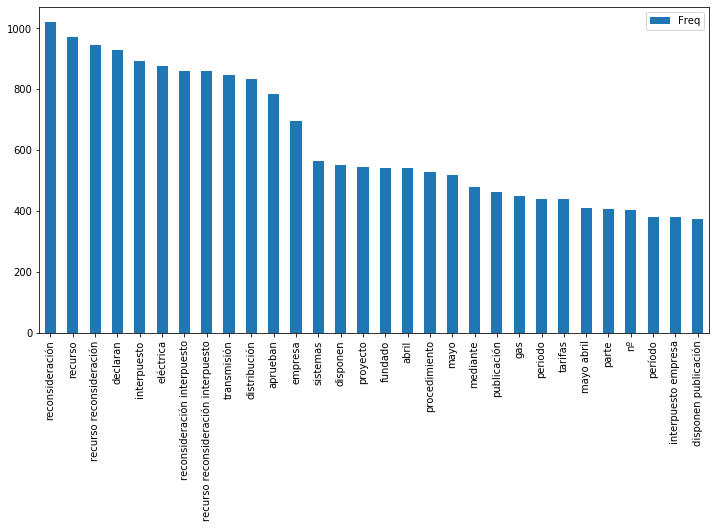

In [57]:
frecuencias.head(30).plot(kind='bar', figsize=(12,6))

In [16]:
!pip install wordcloud

In [17]:
from wordcloud import WordCloud #importo la función

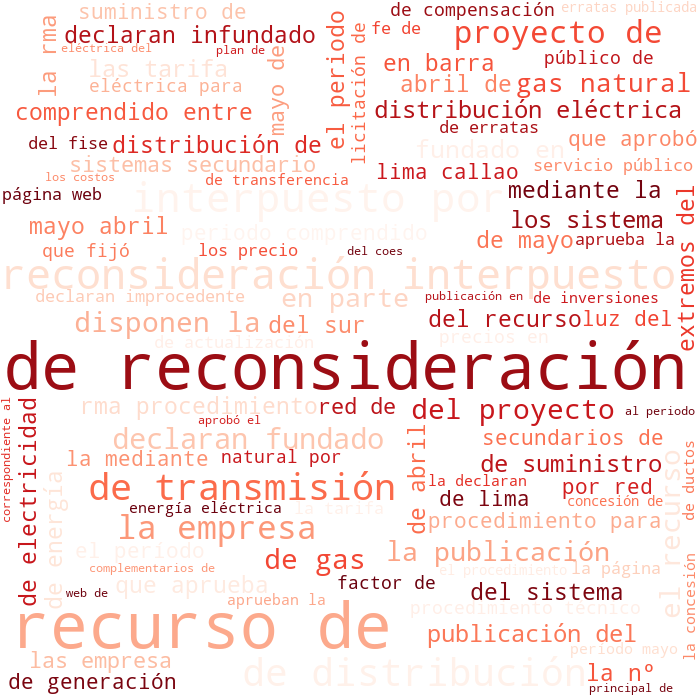

In [18]:
cloud=WordCloud(background_color='white', width=700, height=700, max_words=100, max_font_size=300, stopwords=tf_vectorizer.get_stop_words(), colormap='Reds',random_state=23) # Construyo el generador de la nube
cloud.generate('.'.join(list(data2.Resumen))) # Genero la nube
cloud.to_image() # Despliego la imagen de la nube
# Para ver las gamas de colores vea: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Para ver más parámetros de la nube de palabras: https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery

# MODELO

In [19]:
# Cuántos tópicos deseo
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23, verbose=1) # Construyo el objeto que es el modelo
lda.fit(tf) # Estimo el LDA

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


LatentDirichletAllocation(batch_size=128, doc_topic_prior=0.1,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=8, n_jobs=-1,
                          perp_tol=0.1, random_state=23, topic_word_prior=0.1,
                          total_samples=1000000.0, verbose=1)

In [20]:
print(lda.components_.shape) # De que tma~no es el resultado?
lda.components_ # Exploremos el resultado

(8, 1500)


array([[3.97813240e+01, 1.00001040e-01, 1.00001125e-01, ...,
        1.00001171e-01, 1.00001224e-01, 1.00000532e-01],
       [1.02736417e-01, 1.00000137e-01, 1.00000149e-01, ...,
        1.00001915e-01, 1.00000567e-01, 1.00000600e-01],
       [2.81701794e+02, 1.00002254e-01, 1.00001639e-01, ...,
        1.00000847e-01, 1.00000307e-01, 1.00000325e-01],
       ...,
       [5.77157528e+01, 2.70999927e+01, 2.50999933e+01, ...,
        6.00999839e+01, 5.50999890e+01, 5.20999904e+01],
       [6.93843879e+00, 1.00000000e-01, 1.00000000e-01, ...,
        1.00004308e-01, 1.00004702e-01, 1.00004800e-01],
       [3.02191642e+01, 1.00000461e-01, 1.00000000e-01, ...,
        1.00001971e-01, 1.00000000e-01, 1.00000000e-01]])

In [21]:
# Construyo la función que me ayuda a ver las palabras más importantes de cada tópico
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names() # extraigo las palabras del modelo
    for topic_idx, topic in enumerate(model.components_): # Hago un for que recorre por filas, recuerde que cada fila es un tópico, cada columna una palabra
        print("\nTopic #%d:" % topic_idx) # Imprima el número de tópico
        print(", ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])) #Muestre las n palabras más importantes por orden 

In [22]:
print_topics(lda, tf_vectorizer, 15) # Veo las 15 palabras más importantes de cada tópico


Topic #0:
eléctrica, sistemas, aprueban, liquidación, compensación, programa, transferencias, servicio, ingresos, liquidación anual, liquidación anual ingresos, factor, anual ingresos, anual, social

Topic #1:
eléctrica, distribución, sur, aprueban, nacional, empresas, generación, sistema, precio, energía, nivel, interconectado, interconectado nacional, nivel generación, eléctrico

Topic #2:
transmisión, sistemas, abril, mayo, mayo abril, secundarios, sistemas secundarios, secundarios transmisión, sistemas secundarios transmisión, compensaciones, tarifas, periodo, complementarios, complementarios transmisión, comprendido

Topic #3:
proyecto, disponen, procedimiento, publicación, disponen publicación, rma, publicación proyecto, aprueba, coes, disponen publicación proyecto, aprueban, proyecto aprueba, técnico, rma procedimiento, procedimiento técnico

Topic #4:
recurso, reconsideración, recurso reconsideración, declaran, interpuesto, recurso reconsideración interpuesto, reconsideración 

In [23]:
# Como se ven los documentos?
lda_output=lda.transform(tf) # transformo la matrix de término-documento en tópico-documento
print(lda_output.shape) # Qué indican las dimensiones?
docs=['doc'+str(i) for i in range(lda_output.shape[0])] # Nombres de filas
topics=['topics'+str(i) for i in range(lda_output.shape[1])] # Nombres de columnas
lda_output=pd.DataFrame(lda_output, index=docs, columns=topics)

(3210, 8)


In [24]:
# Exploremos la salida desde el punto de vista de documentos
lda_output.head().sum(axis=1) # Porque las filas suman 1?


doc0    1.0
doc1    1.0
doc2    1.0
doc3    1.0
doc4    1.0
dtype: float64

In [25]:
# Cómo se distribuye el documento promedio?
lda_output.head().mean(axis=0)

topics0    0.085192
topics1    0.361110
topics2    0.034503
topics3    0.033909
topics4    0.010066
topics5    0.169570
topics6    0.010066
topics7    0.295585
dtype: float64

In [26]:
# Creemos la pertenencia al tópicos
topico_dominante = np.argmax(lda_output.values, axis=1) 
lda_output['Topico_dominante']=topico_dominante
lda_output.head(10)

,topics0,topics1,topics2,topics3,topics4,topics5,topics6,topics7,Topico_dominante
doc0,0.092938,0.549058,0.128128,0.125163,0.005953,0.005953,0.005953,0.086854,1
doc1,0.012821,0.012823,0.012823,0.012825,0.012824,0.528451,0.012824,0.394609,5
doc2,0.004386,0.004386,0.004389,0.004386,0.004386,0.004387,0.004386,0.969293,7
doc3,0.006330,0.673788,0.006331,0.006331,0.006331,0.288225,0.006332,0.006331,1
doc4,0.309482,0.565493,0.020841,0.020837,0.020834,0.020837,0.020836,0.020840,1
doc5,0.002646,0.002646,0.002646,0.002646,0.002646,0.981480,0.002646,0.002646,5
doc6,0.003145,0.123254,0.003145,0.041879,0.583375,0.238913,0.003145,0.003145,4
doc7,0.007246,0.007247,0.007246,0.007246,0.949275,0.007246,0.007246,0.007246,4
doc8,0.006761,0.006759,0.006758,0.006762,0.952690,0.006758,0.006757,0.006757,4
doc9,0.004809,0.004808,0.004808,0.004810,0.966341,0.004808,0.004808,0.004808,4


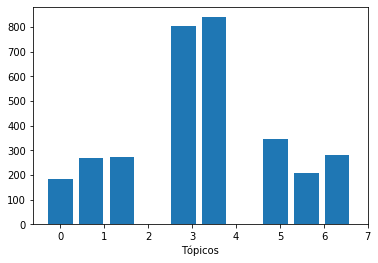

In [27]:
plt.hist(lda_output.Topico_dominante, density=False, rwidth=0.8, align='left')
plt.xlabel('Tópicos')
plt.xticks(range(num_topics));

## Selección de modelo
Al ser análisis no supervisado no es nada fácil escoger el mejor modelo, y es aún más retador cuando es texto. Tenemos una aproximación, la máxima verosimilitud

In [28]:
%%time
# Juguemos con un hiper parámetro
likelihood=[]
values=[i for i in range(2,31,2)]
for i in values:
    modelo = LatentDirichletAllocation(n_components=i, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23) # Construyo el objeto que es el modelo
    modelo.fit(tf)
    likelihood.append(modelo.score(tf))
    print(i)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
Wall time: 1min 36s


Text(0, 0.5, 'log-likelihood')

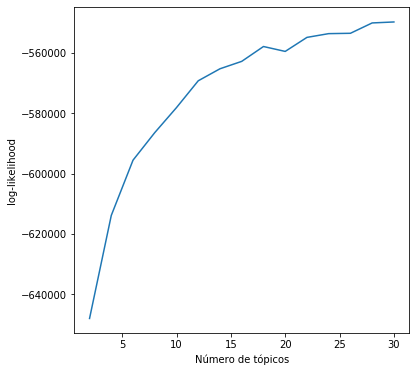

In [29]:
# Visualizamos
plt.figure(figsize=(6,6))
plt.plot(values, likelihood)
plt.xlabel('Número de tópicos')
plt.ylabel('log-likelihood')

## Visualización del LDA
LDAvis es un paquete para la visualización para interpretar más fácilmente el LDA. Vea el paper [aquí](https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf), en este agregan un nuevo parámetro para la interpretació, $\lambda \in [0,1]$, el cual pondera la importancia de una palabra dentro del tópico por la unicidad de la palabra a lo largo de los tópicos. 
* $\lambda\rightarrow1$: este es el caso original, permite que la palabra sea repetida a lo largo de los tópicos.
* $\lambda\rightarrow0$: este caso cambia el rqanking de importancia, dándole mayor importancia a las palabras que sean únicas del tópico, es decir que no aparezcan casi en los demás.


In [30]:
import pyLDAvis # Paquete que crea la visualización
from pyLDAvis import sklearn as sklearnlda

In [31]:
LDAvis_prepared=sklearnlda.prepare(lda, tf, tf_vectorizer ) # Preparo el modelo y sus resultados para la visualización
pyLDAvis.save_html(LDAvis_prepared, "peru.html") # Guardo la visualización como html

C:\Users\Jorge Guerra\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [32]:
pyLDAvis.display(LDAvis_prepared) # Lo visualizo dentro del notebook